In [4]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pycourse_lesson3_4_scripts as us
import scipy.stats as stat
from copy import deepcopy
from sklearn import cluster
import community

In [7]:
cdf = pandas.read_csv('/Users/jakevogel/Science/tmp/tau/other_clustering_attempts/byhand/small_dimensional_tau4d.csv')
cdf.drop(cdf.index[0],axis=0,inplace=True)
cdf.drop(cdf.columns[0],axis=1,inplace=True)

In [6]:
cdf.shape
#sns.heatmap(cdf)
#plt.show()

(731, 90)

In [10]:
cdf.ix[300,:]

0     0.414734
1     0.366230
2     0.034381
3     0.443964
4     0.966276
5     0.901580
6     0.534470
7     0.512250
8     1.208392
9     1.136785
10    0.366027
11    0.390310
12    0.714019
13    0.703745
14    0.333407
15    0.145017
16    0.451921
17    0.488662
18    0.145900
19    0.034619
20    0.452290
21    0.700336
22    0.397905
23    0.242432
24    0.602973
25    1.237289
26    0.650797
27    0.161457
28    0.729012
29    0.997295
        ...   
59    0.398728
60    0.727776
61    0.809744
62    0.697916
63    1.382468
64    0.878046
65    0.646854
66    0.442677
67    0.530688
68    0.398510
69    0.395501
70    0.123818
71    0.123070
72    0.369784
73    0.367991
74    0.348320
75    0.378021
76    0.613253
77    0.889172
78    0.843041
79    0.476171
80    0.659274
81    1.006475
82    0.817593
83    0.401722
84    0.453710
85    0.778849
86    0.507218
87    0.146457
88    0.099745
Name: 300, dtype: float64

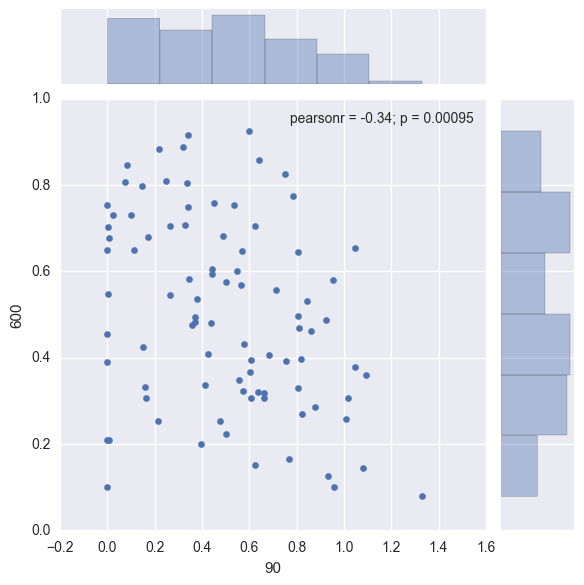

In [55]:
plt.close()
sns.jointplot(cdf.ix[90,:],cdf.ix[600,:])
plt.show()

In [3]:
corrmat = cdf.transpose().corr()

In [75]:
corrmat.shape

(730, 730)

In [63]:
sns.heatmap?

In [137]:
corrmat.to_csv('corr_mtx.csv')

In [103]:
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True,xticklabels=100, yticklabels=100)
plt.savefig('/Users/jakevogel/Dropbox/tmp/tau/other_clustering_attempts/byhand/correlation_matrix',
           bbox_inches='tight')

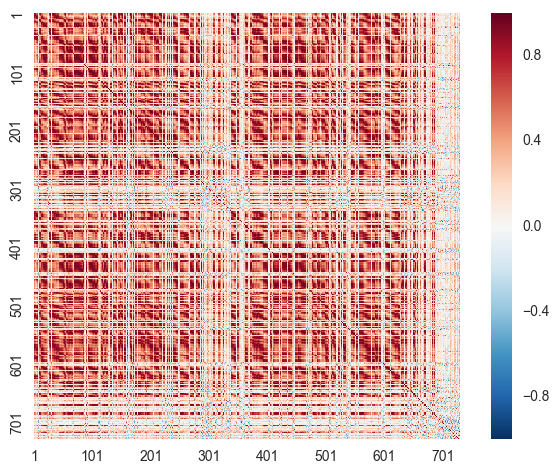

In [102]:
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True,xticklabels=100, yticklabels=100)
plt.show()

In [68]:
covmat = cdf.transpose().cov()

In [104]:
f, ax = plt.subplots()
sns.heatmap(covmat, square=True,xticklabels=100, yticklabels=100,vmin=-0.01,vmax=0.01)
plt.savefig('/Users/jakevogel/Dropbox/tmp/tau/other_clustering_attempts/byhand/covariance_matrix',
           bbox_inches='tight')

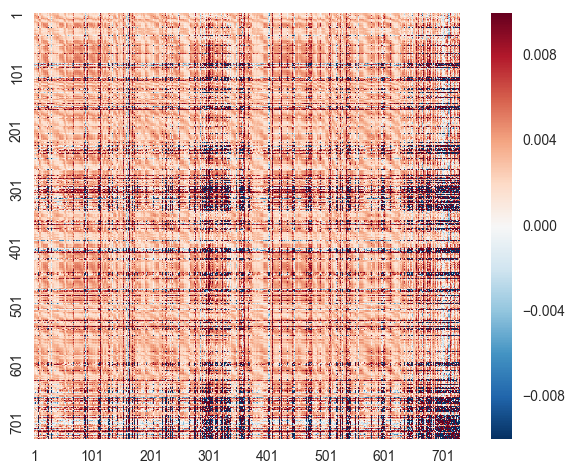

In [71]:
f, ax = plt.subplots()
sns.heatmap(covmat, square=True,xticklabels=100, yticklabels=100,vmin=-0.01,vmax=0.01)
plt.show()

In [82]:
corr_kmeans = cluster.KMeans(n_clusters=6, random_state=0).fit(corrmat)
corr_labz = corr_kmeans.labels_.tolist()

In [84]:
cov_kmeans = cluster.KMeans(n_clusters=6, random_state=0).fit(covmat)
cov_labz = cov_kmeans.labels_.tolist()

In [88]:
corr_copy = deepcopy(corrmat)

In [97]:
naxis = []
for x in range(6):
    for i in range(len(corr_labz)):
        if corr_labz[i] == x:
            naxis.append(i)
corr_tst = np.array(corr_copy)[:, naxis][naxis]

In [105]:
f, ax = plt.subplots()
sns.heatmap(corr_tst, square=True,xticklabels=100, yticklabels=100)
plt.savefig('/Users/jakevogel/Dropbox/tmp/tau/other_clustering_attempts/byhand/kmeans6_on_corrmat',
           bbox_inches='tight')

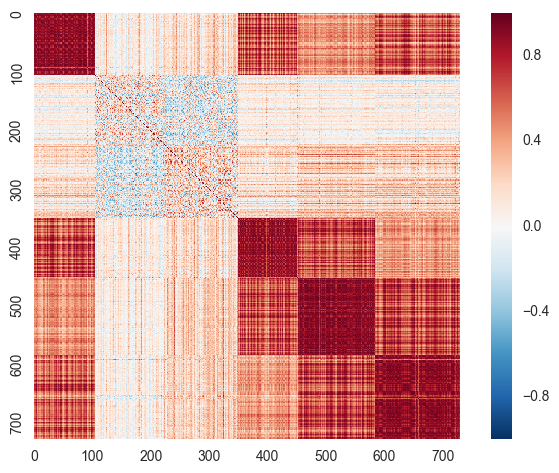

In [98]:
f, ax = plt.subplots()
sns.heatmap(corr_tst, square=True,xticklabels=100, yticklabels=100)
plt.show()

In [99]:
cov_copy = deepcopy(covmat)
naxis = []
for x in range(6):
    for i in range(len(cov_labz)):
        if cov_labz[i] == x:
            naxis.append(i)
cov_tst = np.array(cov_copy)[:, naxis][naxis]

In [106]:
f, ax = plt.subplots()
sns.heatmap(cov_tst, square=True,xticklabels=100, yticklabels=100,vmin=-0.01,vmax=0.01)
plt.savefig('/Users/jakevogel/Dropbox/tmp/tau/other_clustering_attempts/byhand/kmeans6_on_covmat',
           bbox_inches='tight')

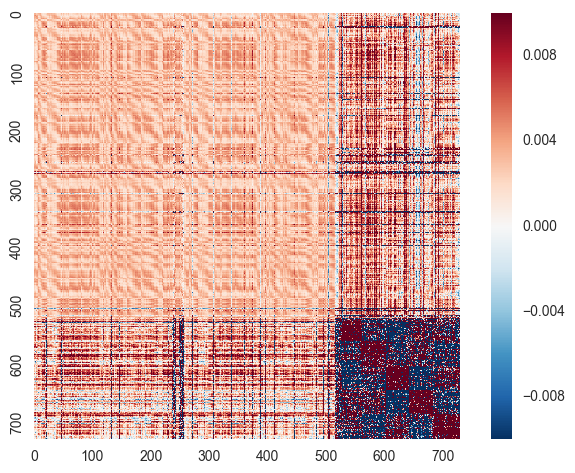

In [101]:
f, ax = plt.subplots()
sns.heatmap(cov_tst, square=True,xticklabels=100, yticklabels=100,vmin=-0.01,vmax=0.01)
plt.show()

In [124]:
non_redund_cons = np.tril(corr_copy)

In [113]:
len(non_redund_cons.flat)

532900

In [115]:
#bin_val = sorted(non_redund_cons)[int(0.95*len(non_redund_cons))]

IndexError: list index out of range

In [4]:
jnk = np.array(corrmat)
edges = jnk[np.tril_indices(len(jnk))]  
bin_val = sorted(edges)[int(0.95*len(edges))]
bin_val

0.91510326885439475

In [5]:
bin_corr = deepcopy(corrmat)
bin_corr[bin_corr < bin_val] = 0
bin_corr[bin_corr < 0] = 1

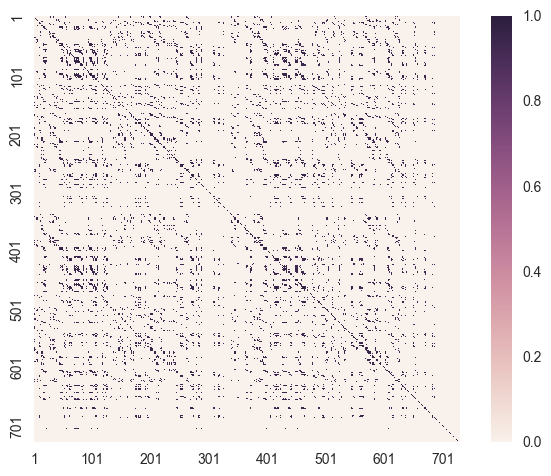

In [6]:
f, ax = plt.subplots()
sns.heatmap(bin_corr, square=True,xticklabels=100, yticklabels=100)
plt.show()

In [ ]:
graph = nx.from_numpy_matrix(bin_corr.values)

In [15]:
parts = community.best_partition(graph)

In [17]:
values = [parts.get(node) for node in graph.nodes()]

In [46]:
print(len(values))
print(len(set(values)))

730
261


In [47]:
naxis = []
for x in range(261):
    for i in range(len(values)):
        if values[i] == x:
            naxis.append(i)
corr_comm_part = np.array(corrmat)[:, naxis][naxis]

In [48]:
bin_comm_part = np.array(bin_corr)[:, naxis][naxis]

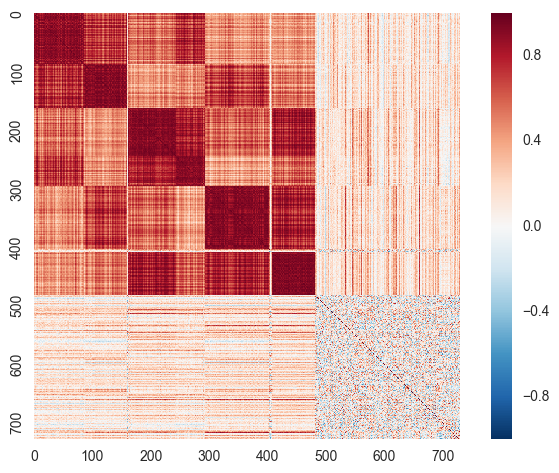

In [49]:
f, ax = plt.subplots()
sns.heatmap(corr_comm_part, square=True,xticklabels=100, yticklabels=100)
plt.show()

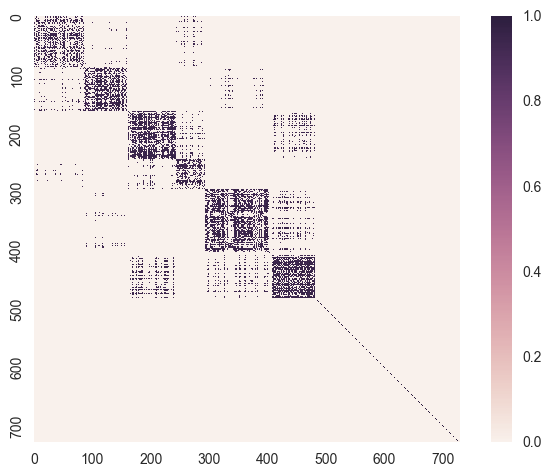

In [50]:
f, ax = plt.subplots()
sns.heatmap(bin_comm_part, square=True,xticklabels=100, yticklabels=100)
plt.show()

In [44]:
## Interestingly, this appeared to create 261 partition labels but still organized them into 
## 5 partitions. Let's get the lower resolution labels as well

## EDIT: Its because in the axis rearrangement I set i to 6. This might be a good way of 
# changing resolution given differnt solutions... If you don't know what I mean, set i back
# to 6 (from 237) and visualize the plot.
count = 1
nlabs = {}
ax_prev = -1
n = 0
for i in range(1,5):
    labs = []
    while naxis[n] > ax_prev:
        labs.append(values[n])
        ax_prev,n = naxis[n],n+1
    nlabs.update({i:list(set(labs))})
    ax_prev = -1
    

In [58]:
# find out how many atoms belong in each cluster
catch = {}
for val in values:
    if val in catch.keys():
        catch.update({val:catch[val]+1})
    else:
        catch.update({val:1})

# identify which labels have multiple values
good_labs = []
for k,v in catch.items():
    if v>30:
        good_labs.append(k)
        print(k,v)
good_labs

0 87
1 74
3 82
4 51
5 108
12 73


[0, 1, 3, 4, 5, 12]

In [60]:
# map back into image

# import image
import nibabel as ni
atlas = '/Users/jakevogel/Dropbox/tmp/tau/other_clustering_attempts/byhand/brain_rois.nii.gz'
jnk = ni.load(atlas)
dat = jnk.get_data()
aff = jnk.affine

In [63]:
# map
for i,lab in enumerate(values):
    i = i+1 # Because we don't want to touch the zeros, and the corrmat starts from 1 anyway. 
    if lab in good_labs:
        dat[dat==i] = lab + 1000
    else:
        dat[dat==i] = 1020


In [67]:
# write to image
nimg=ni.Nifti1Image(dat,aff)
nimg.to_filename('/Users/jakevogel/Dropbox/tmp/tau/other_clustering_attempts/byhand/community_partition')

In [130]:
cov_non_redund_cons = np.tril(cov_copy)
cov_bin_val = sorted(cov_non_redund_cons.flat)[int(0.95*len(cov_non_redund_cons.flat))]
bin_cov = deepcopy(cov_tst)
bin_cov[bin_cov < bin_cov] = 0
bin_cov[bin_cov < 0] = 1

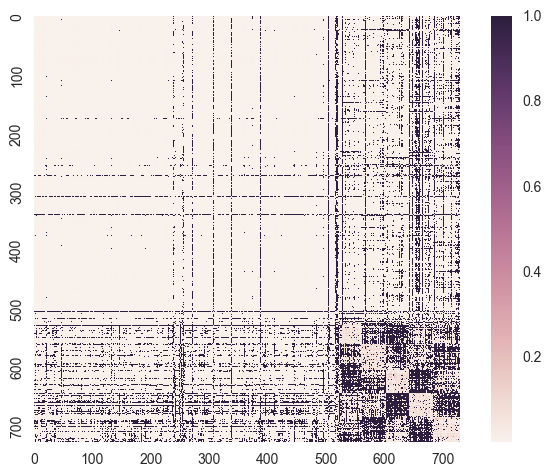

In [131]:
f, ax = plt.subplots()
sns.heatmap(bin_cov, square=True,xticklabels=100, yticklabels=100)
plt.show()

In [70]:
cluster.AgglomerativeClustering?

In [71]:
ac1 = cluster.AgglomerativeClustering(n_clusters=6,connectivity=corrmat)

In [72]:
corr_ac = ac1.fit(corrmat)

In [73]:
ac_labz = corr_ac.labels_.tolist()
naxis = []
for x in range(6):
    for i in range(len(ac_labz)):
        if ac_labz[i] == x:
            naxis.append(i)
ac_tst = np.array(corrmat)[:, naxis][naxis]

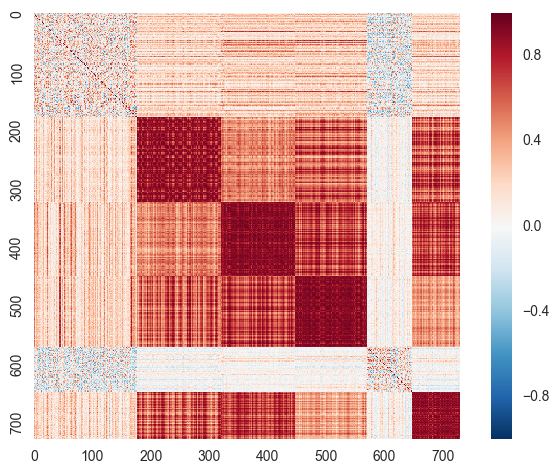

In [74]:
f, ax = plt.subplots()
sns.heatmap(ac_tst, square=True,xticklabels=100, yticklabels=100)
plt.show()

In [75]:
# import image
print('importing')
import nibabel as ni
atlas = '/Users/jakevogel/Dropbox/tmp/tau/other_clustering_attempts/byhand/brain_rois.nii.gz'
jnk = ni.load(atlas)
dat = jnk.get_data()
aff = jnk.affine

print('mapping')
# map
for i,lab in enumerate(ac_labz):
    i = i+1 # Because we don't want to touch the zeros, and the corrmat starts from 1 anyway. 
    dat[dat==i] = lab + 1000

print('writing')
# write to image
nimg=ni.Nifti1Image(dat,aff)
nimg.to_filename('/Users/jakevogel/Dropbox/tmp/tau/other_clustering_attempts/byhand/agglom_clust_ward')

importing
mapping
writing


In [15]:
# As of now, while all of the cluster algorithms work, they are not producing biologically 
# meaningful clusters. Perhaps the issue is that the data is not first z-scored, that I'm 
# working with a correlation matrix, or that the stability clusters are actually that much
# more robust than typical clusters. Maybe I should only be putting in the lower half of 
# the matrix? Lets mess around with these ideas..

cdf.head()

0         1         2         3         4         5         6  \
1  0.431498  0.457817  0.546521  0.472015  0.446770  0.415590  0.517747   
2  0.441526  0.453066  0.518335  0.462094  0.437340  0.392915  0.485251   
3  0.438376  0.439942  0.550225  0.469891  0.429222  0.381878  0.524232   
4  0.399619  0.463130  0.549458  0.430037  0.413259  0.394208  0.487248   
5  0.409808  0.440763  0.497919  0.443196  0.389045  0.340933  0.439235   

          7         8         9    ...           79        80        81  \
1  0.465931  0.472725  0.464031    ...     0.424222  0.525087  0.353211   
2  0.458334  0.467958  0.456257    ...     0.413738  0.523362  0.359717   
3  0.438029  0.424725  0.398873    ...     0.447948  0.572291  0.363531   
4  0.434331  0.403072  0.399173    ...     0.397575  0.467365  0.328151   
5  0.415417  0.409024  0.372026    ...     0.388394  0.509679  0.343249   

         82        83        84        85        86        87        88  
1  0.374981  0.500645  0.391929  0.443525  0.459920  0.419425  0.494870  
2  0.386790  0.519008  0.410223  0.475681  0.490472  0.427594  0.483158  
3  0.391319  0.536736  0.413295  0.456737  0.488440  0.448531  0.512849  
4  0.367443  0.434670  0.354191  0.370376  0.441448  0.386475  0.413068  
5  0.376701  0.484072  0.423794  0.429880  0.457952  0.406609  0.464897  

[5 rows x 89 columns]

In [16]:
# z-score
zcdf = stat.zscore(cdf)

In [21]:
#tri = np.tril_indices_from(zcdf)
len(tri[1])

61054

In [22]:
61054/1000

61.054

In [ ]:
rf_mtx = np.empty((len(zcdf),len(zcdf)))
cnt = 0
for i, ind in enumerate(tri[0]):
    j = tri[1][i]
    if i%61 == 0:
        print('finished batch %s of 1000'%(x))
        x = x + 1
        tvals = smf.RLM(zcdf[i,:],zcdf[m:m+88,:].transpose()).fit().tvalues
    

In [127]:
# make robust fit matrix
rf_mtx = np.empty((len(zcdf),len(zcdf)))
for i in range(len(zcdf)):
    print('working on %sth iteration of %s'%(i,len(zcdf)))
    for x in range(10):
        if x != 9:
            m = x * 88
            tvals = smf.RLM(zcdf[i,:],zcdf[m:m+88,:].transpose()).fit().tvalues
            rf_mtx[i,m:m+88] = tvals

working on 0th iteration of 730
working on 1th iteration of 730
working on 2th iteration of 730
working on 3th iteration of 730
working on 4th iteration of 730
working on 5th iteration of 730
working on 6th iteration of 730
working on 7th iteration of 730
working on 8th iteration of 730
working on 9th iteration of 730
working on 10th iteration of 730
working on 11th iteration of 730
working on 12th iteration of 730
working on 13th iteration of 730
working on 14th iteration of 730
working on 15th iteration of 730
working on 16th iteration of 730
working on 17th iteration of 730
working on 18th iteration of 730
working on 19th iteration of 730
working on 20th iteration of 730
working on 21th iteration of 730
working on 22th iteration of 730
working on 23th iteration of 730
working on 24th iteration of 730
working on 25th iteration of 730
working on 26th iteration of 730
working on 27th iteration of 730
working on 28th iteration of 730
working on 29th iteration of 730
working on 30th iter

In [139]:
np.fill_diagonal(rf_mtx,1)
rf_mtx.diagonal()

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [144]:
zacl = cluster.AgglomerativeClustering(n_clusters=6,connectivity=rf_mtx).fit(rf_mtx)
zac_labz = zacl.labels_.tolist()
naxis = []
for x in range(6):
    for i in range(len(zac_labz)):
        if zac_labz[i] == x:
            naxis.append(i)
zac_tst = np.array(rf_mtx)[:, naxis][naxis]

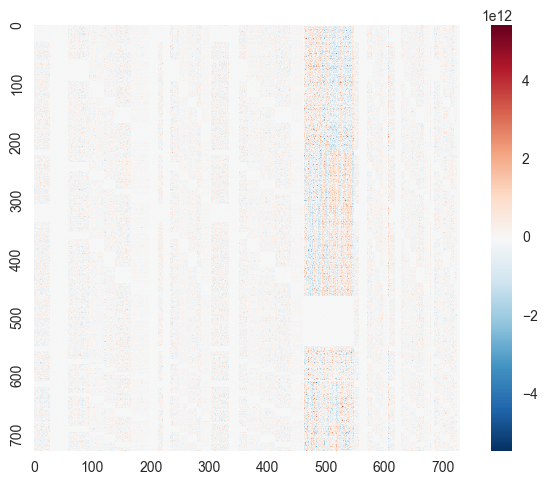

In [145]:
f, ax = plt.subplots()
sns.heatmap(zac_tst, square=True,xticklabels=100, yticklabels=100)
plt.show()

In [19]:
print('importing')
import nibabel as ni
atlas = '/Users/jakevogel/Dropbox/tmp/tau/other_clustering_attempts/byhand/brain_rois.nii.gz'
jnk = ni.load(atlas)
dat = jnk.get_data()
aff = jnk.affine

print('mapping')
# map
for i,lab in enumerate(zac_labz):
    i = i+1 # Because we don't want to touch the zeros, and the corrmat starts from 1 anyway. 
    dat[dat==i] = lab + 1000

print('writing')
# write to image
nimg=ni.Nifti1Image(dat,aff)
nimg.to_filename('/Users/jakevogel/Dropbox/tmp/tau/other_clustering_attempts/byhand/z_agglom_clust_ward')

importing
mapping
writing


In [2]:
import nipype.interfaces.afni as afni

In [3]:
afni.preprocess.BlurToFWHM?